# 1. Exploratory Data Analysis (EDA)

Objetivo: entender la estructura, calidad y patrones de los datos antes de procesarlos.

Aquí haremos:
- Eliminación de duplicados ✅ (siguiente paso: 1.3)
- Análisis de valores nulos
- Estadísticas por serie
- Visualización de series representativas
- Tendencias y estacionalidades básicas

## 1.1 Load Data

In [108]:
# Libraries
# -- Stdlib & setup
import os, sys, warnings, json, re
from pathlib import Path
from datetime import datetime
warnings.filterwarnings("ignore")
# -- Ciencia de datos base
import numpy as np
import pandas as pd
from scipy import stats as ss
# -- Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# --- Interactivas (opcional; idk si las usaremos pero jic)
import plotly.express as px
import plotly.graph_objects as go
# -- Utilidades
from IPython.display import display
from tqdm import tqdm
import joblib

In [109]:
raw = pd.read_csv("../data/train_timeseries.csv")
df0 = raw.copy() # copia de seguridad

## 1.2 STRUCTURE

In [110]:
df0.head() # vista general rápida

,Unnamed: 0,date,unique_id,city_id,shop_id,item_category_id,item_id,monthly_average_price,monthly_sales
0,0,2013-01-31,12_11365,16,12,9,11365,1511.512626,30.0
1,1,2013-01-31,12_11369,16,12,9,11369,572.715278,30.0
2,2,2013-01-31,12_11370,16,12,9,11370,699.776786,30.0
3,3,2013-01-31,12_11373,16,12,9,11373,548.900000,6.0
4,4,2013-01-31,12_12231,16,12,49,12231,350.000000,3.0


In [111]:
df0.shape # dimensión

(14484, 9)

In [112]:
list(df0.columns) # column list

['Unnamed: 0',
 'date',
 'unique_id',
 'city_id',
 'shop_id',
 'item_category_id',
 'item_id',
 'monthly_average_price',
 'monthly_sales']

In [113]:
df0.info # info tipos y nulos

<bound method DataFrame.info of        Unnamed: 0        date unique_id  city_id  shop_id  item_category_id  \
0               0  2013-01-31  12_11365       16       12                 9   
1               1  2013-01-31  12_11369       16       12                 9   
2               2  2013-01-31  12_11370       16       12                 9   
3               3  2013-01-31  12_11373       16       12                 9   
4               4  2013-01-31  12_12231       16       12                49   
...           ...         ...       ...      ...      ...               ...   
14479       14479  2015-10-31    7_5822       21        7                35   
14480       14480  2015-10-31    7_6185       21        7                30   
14481       14481  2015-10-31    7_6497       21        7                28   
14482       14482  2015-10-31    7_7856       21        7                28   
14483       14483  2015-10-31    7_7893       21        7                 6   

       item_id  mon

In [114]:
df0.dtypes # info tipo por columna

Unnamed: 0                 int64
date                      object
unique_id                 object
city_id                    int64
shop_id                    int64
item_category_id           int64
item_id                    int64
monthly_average_price    float64
monthly_sales            float64
dtype: object

In [115]:
df0.dtypes.value_counts() # info columnas por tipo

int64      5
object     2
float64    2
Name: count, dtype: int64

In [116]:
df0.columns.str.contains('Unnamed') # columnas que contienen 'Unnamed'

array([ True, False, False, False, False, False, False, False, False])

In [117]:
df0.describe().T # resumen estadístico columnas numéricas

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,14484.0,7241.500000,4181.314985,0.000000,3620.75,7241.5,10862.25,14483.000000
city_id,14484.0,10.833333,6.227364,0.000000,7.00,7.0,16.00,23.000000
shop_id,14484.0,31.967136,15.236351,3.000000,22.00,31.0,44.00,59.000000
item_category_id,14484.0,39.356808,20.439654,2.000000,30.00,35.0,55.00,83.000000
item_id,14484.0,8626.431925,5905.273346,32.000000,4248.00,6457.0,12551.00,22088.000000
monthly_average_price,13262.0,916.089314,820.945949,4.928571,299.00,649.0,1149.00,9305.121212
monthly_sales,13756.0,7.337889,7.915032,0.000000,2.00,5.0,9.00,30.000000


## 1.3 Duplicate Analysis

In [118]:
# 1️⃣ Duplicados exactos
duplicates_total = df0.duplicated().sum()
print(f"Duplicados exactos en todo el dataframe: {duplicates_total}")

# 2️⃣ Duplicados por clave lógica (unique_id + date)
dup_key = df0.duplicated(subset=["unique_id", "date"]).sum()
print(f"Duplicados por (unique_id, date): {dup_key}")

# 3️⃣ Si existen, inspeccionamos algunos
if dup_key > 0:
    display(df0[df0.duplicated(subset=["unique_id", "date"], keep=False)].sort_values(["unique_id", "date"]).head(10))
else:
    print("✅ No hay duplicados por clave lógica.")


Duplicados exactos en todo el dataframe: 0
Duplicados por (unique_id, date): 0
✅ No hay duplicados por clave lógica.


📌 Conclusión – Sección 1.3 (Duplicate Analysis)

Durante el análisis de duplicados se comprobó que el dataset no presenta registros repetidos, ni de forma exacta (mismo contenido en todas las columnas), ni por su clave lógica compuesta por unique_id y date, que representa la combinación única de serie temporal y mes.
Esto significa que:
- Cada observación del dataset corresponde a un único par (serie temporal, fecha), sin inconsistencias ni redundancias.
- No es necesario realizar limpieza o consolidación de filas duplicadas.
- Se garantiza la integridad temporal y relacional de los datos, lo cual es fundamental para los pasos posteriores de análisis, feature engineering y modelado.

✅ Conclusión: el dataset está libre de duplicados y listo para continuar con el análisis de valores nulos y calidad de datos.

## 1.4 Null Value Analysis

In [119]:
print("Análisis de valores nulos e información básica por columna\n")

null_count = df0.isna().sum()
null_pct   = (null_count / len(df0) * 100).round(2)
nunique_no_na = df0.nunique(dropna=True)

def safe_mode(s):
    try:
        m = s.mode(dropna=True)
        return m.iloc[0] if len(m) else None
    except Exception:
        return None

modes = df0.apply(safe_mode)
mode_pct = df0.apply(lambda s: ((s == safe_mode(s)).mean() * 100) if s.notna().any() else None)
mode_pct = mode_pct.round(2)

resumen = (
    pd.DataFrame({
        "N Nulos": null_count,
        "% Nulos": null_pct,
        "N Valores Únicos": nunique_no_na,
        "% Moda": mode_pct,
        "Valor Moda": modes
    })
    .sort_values("N Nulos", ascending=False)
)

resumen_filtrado = resumen[resumen["N Nulos"] > 0].copy()
resumen_filtrado.index.name = "Columna"
resumen_filtrado.reset_index(inplace=True)
resumen_filtrado.index = resumen_filtrado.index + 1

print(f"Total de columnas con valores nulos: {resumen_filtrado.shape[0]}")
display(resumen_filtrado.head(25))


Análisis de valores nulos e información básica por columna

Total de columnas con valores nulos: 2


,Columna,N Nulos,% Nulos,N Valores Únicos,% Moda,Valor Moda
1,monthly_average_price,1222,8.44,2383,7.75,299.0
2,monthly_sales,728,5.03,31,12.32,2.0


📌 Conclusión – Sección 1.4 (Null Value Analysis)


## 1.5 Perfilado temporal por serie

Objetivo: entender cómo se comporta cada unique_id a lo largo del tiempo (tendencia, estacionalidad, zeros, faltantes) y confirmar que el horizonte de predicción es Oct-2015 con ventas faltantes (lo que vamos a predecir).

### 1.5.1 Comprobaciones temporales clave

In [120]:
# A) Partimos SIEMPRE de df0 (raw, solo lectura)
assert set(df0.columns) == {'Unnamed: 0','date','unique_id','city_id','shop_id',
                            'item_category_id','item_id','monthly_average_price','monthly_sales'}, \
       "df0 no tiene las columnas esperadas. Revisa carga."

# B) df1 = df0 tipado y ordenado temporalmente (primer estado 'limpio')
df1 = df0.copy()
df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.sort_values(['unique_id','date'], kind='stable')

# C) Cobertura temporal por serie (sobre df1)
per_serie = (df1
    .groupby('unique_id')
    .agg(
        n_rows=('date','size'),
        first_date=('date','min'),
        last_date=('date','max'),
        n_nan_sales=('monthly_sales', lambda s: s.isna().sum()),
        n_nan_price=('monthly_average_price', lambda s: s.isna().sum()),
        zero_share=('monthly_sales', lambda s: (s.fillna(0)==0).mean())
    )
    .reset_index()
)
display(per_serie.head())

# D) NaNs de ventas: ¿están en Oct-2015?
mask_oct = df1['date'].dt.to_period('M') == pd.Period('2015-10')
print("NaN de ventas en Oct-2015:", df1.loc[mask_oct, 'monthly_sales'].isna().sum())
print("NaN de ventas FUERA de Oct-2015:", df1.loc[~mask_oct, 'monthly_sales'].isna().sum())

# E) ¿Tenemos Sep-2015 para validación?
has_sep = (df1['date'].dt.to_period('M') == pd.Period('2015-09')).any()
print("¿Existe Sep-2015 en el dataset?:", bool(has_sep))

# F) Series que NO llegan a Sep-2015
last_by_id = df1.groupby('unique_id')['date'].max().dt.to_period('M')
ids_missing_sep = last_by_id[last_by_id < pd.Period('2015-09')].index.tolist()
print("Series que NO alcanzan Sep-2015:", len(ids_missing_sep))

,unique_id,n_rows,first_date,last_date,n_nan_sales,n_nan_price,zero_share
0,12_11365,34,2013-01-31,2015-10-31,1,1,0.029412
1,12_11369,34,2013-01-31,2015-10-31,1,1,0.029412
2,12_11370,34,2013-01-31,2015-10-31,1,1,0.029412
3,12_11373,34,2013-01-31,2015-10-31,1,1,0.029412
4,12_12231,34,2013-01-31,2015-10-31,1,2,0.058824


NaN de ventas en Oct-2015: 426
NaN de ventas FUERA de Oct-2015: 302
¿Existe Sep-2015 en el dataset?: True
Series que NO alcanzan Sep-2015: 0



NaN en y durante Sep-2015: 0

NaNs de y por mes (excluyendo Oct-2015):


yyyymm
2013-01    133
2013-02     96
2013-03     47
2013-04     26
2013-05      0
2013-06      0
2013-07      0
2013-08      0
2013-09      0
2013-10      0
2013-11      0
2013-12      0
2014-01      0
2014-02      0
2014-03      0
2014-04      0
2014-05      0
2014-06      0
2014-07      0
2014-08      0
2014-09      0
2014-10      0
2014-11      0
2014-12      0
2015-01      0
2015-02      0
2015-03      0
2015-04      0
2015-05      0
2015-06      0
2015-07      0
2015-08      0
2015-09      0
Freq: M, Name: monthly_sales, dtype: int64

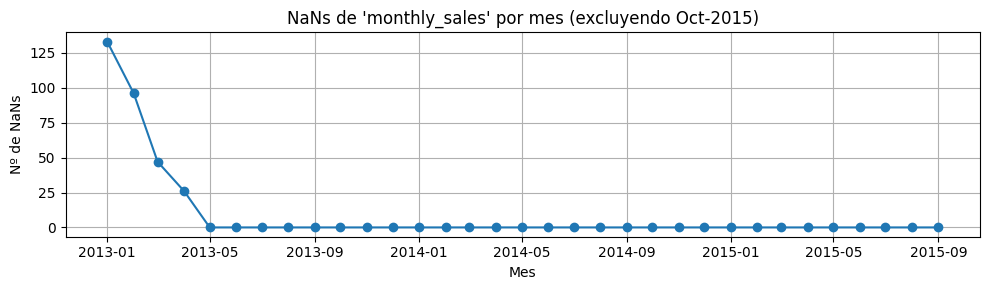

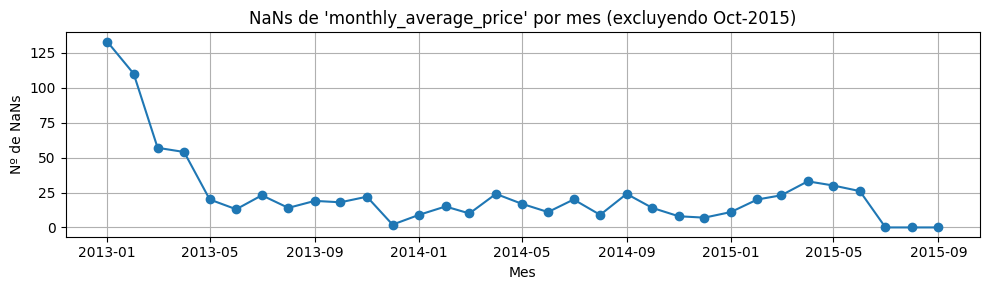


Top series con más NaNs de y (fuera de Oct-2015):


unique_id
55_15077    4
55_11272    4
21_20949    4
57_6497     4
46_20949    4
5_20949     4
24_20949    4
45_20949    4
55_838      4
55_798      4
Name: monthly_sales, dtype: int64

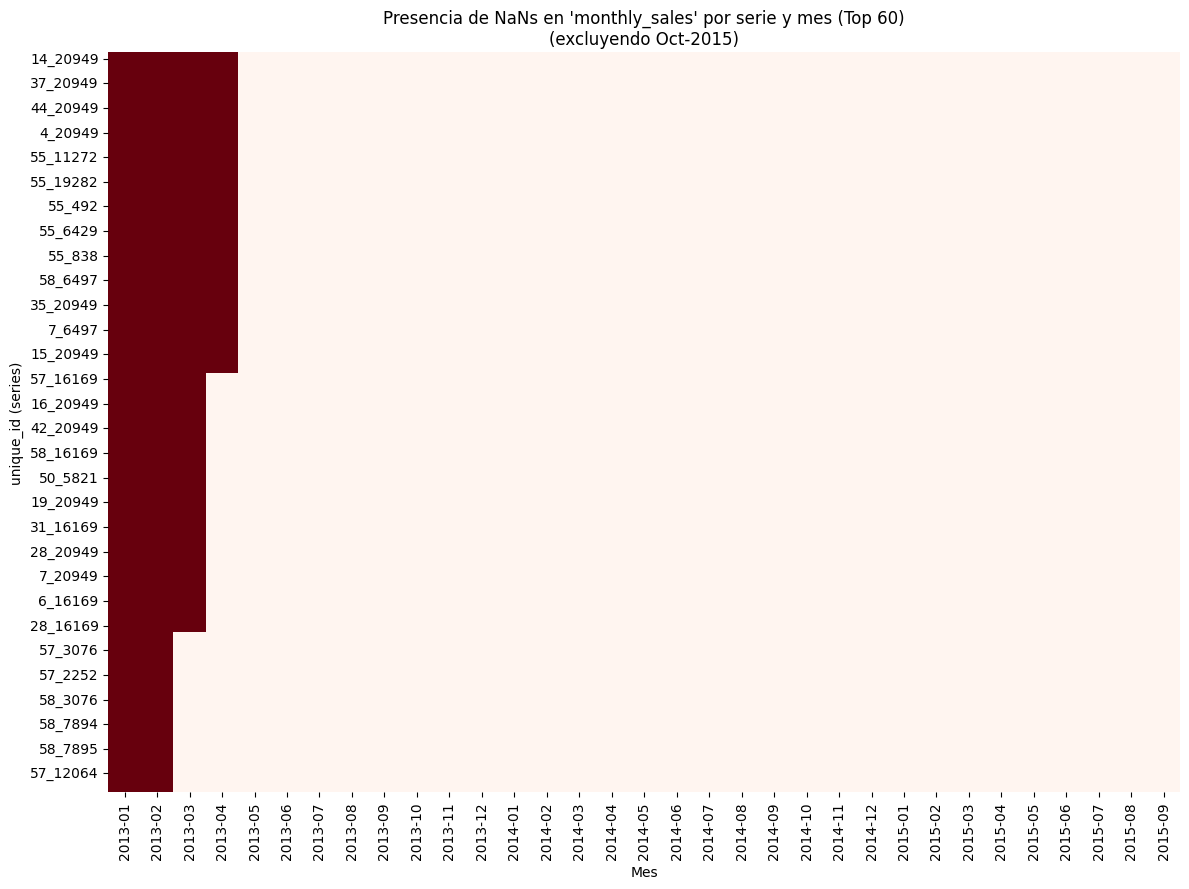


--- Resumen para Interpretación ---
- Series totales: 426
- NaN en y en Oct-2015 (test): 426  (esperado ≈ nº de series)
- NaN en y fuera de Oct-2015: 302  (~2.15% de las filas de entrenamiento)
- ¿Hay NaNs en Sep-2015?: NO


In [ ]:

# -- Checks rápidos complementarios

# G) NaNs en Sep-2015
is_sep = df1['date'].dt.to_period('M') == pd.Period('2015-09')
nan_sep = df1.loc[is_sep, 'monthly_sales'].isna().sum()
print("\nNaN en y durante Sep-2015:", nan_sep)
if nan_sep > 0:
    bad_ids = df1.loc[is_sep & df1['monthly_sales'].isna(), 'unique_id'].unique()
    print("Series con y NaN en Sep-2015:", len(bad_ids))
    print(list(bad_ids)[:10], "...")

# H) Distribución de NaNs de y fuera de Oct-2015
nan_by_month = (df1.loc[~mask_oct]
                  .assign(yyyymm=lambda x: x['date'].dt.to_period('M'))
                  .groupby('yyyymm')['monthly_sales']
                  .apply(lambda s: s.isna().sum())
                  .astype(int))

nan_by_id = (df1.loc[~mask_oct]
               .groupby('unique_id')['monthly_sales']
               .apply(lambda s: s.isna().sum())
               .sort_values(ascending=False))

print("\nNaNs de y por mes (excluyendo Oct-2015):")
display(nan_by_month)

# H.Viz1a) Línea de NaNs de ventas por mes (excluyendo Oct-2015)
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(nan_by_month.index.to_timestamp(), nan_by_month.values, marker='o')
ax.set_title("NaNs de 'monthly_sales' por mes (excluyendo Oct-2015)")
ax.set_xlabel("Mes")
ax.set_ylabel("Nº de NaNs")
ax.grid(True)
plt.tight_layout()
plt.show()

# H.Viz1b) Línea de NaNs de price por mes (excluyendo Oct-2015)
mask_oct = df1['date'].dt.to_period('M') == pd.Period('2015-10')

nan_price_by_month = (df1.loc[~mask_oct]
                        .assign(yyyymm=lambda x: x['date'].dt.to_period('M'))
                        .groupby('yyyymm')['monthly_average_price']
                        .apply(lambda s: s.isna().sum())
                        .astype(int))

plt.figure(figsize=(10,3))
plt.plot(nan_price_by_month.index.to_timestamp(), nan_price_by_month.values, marker='o')
plt.title("NaNs de 'monthly_average_price' por mes (excluyendo Oct-2015)")
plt.xlabel("Mes"); plt.ylabel("Nº de NaNs"); plt.grid(True); plt.tight_layout(); plt.show()


print("\nTop series con más NaNs de y (fuera de Oct-2015):")
display(nan_by_id.head(10))

# H.Viz2) Heatmap de presencia de NaNs por serie y mes (excl. Oct)
tmp = (df1.loc[~mask_oct]
         .assign(yyyymm=lambda x: x['date'].dt.to_period('M'),
                 is_nan=lambda x: x['monthly_sales'].isna().astype(int)))

# matriz binaria: filas=series, columnas=mes, valor=1 si hay NaN en ese mes
mat = (tmp
       .pivot_table(index='unique_id',
                    columns='yyyymm',
                    values='is_nan',
                    aggfunc='max',  # por si hubiera duplicados, con 1 basta
                    fill_value=0)
       .sort_index(axis=1))  # ordenar columnas por tiempo

# nos quedamos con series que tengan algún NaN (y las ordenamos por nº de NaNs desc)
mat_any = mat.loc[mat.sum(axis=1) > 0]
mat_any = mat_any.assign(total_nan=mat_any.sum(axis=1)) \
                 .sort_values('total_nan', ascending=False) \
                 .drop(columns='total_nan')

# para no hacer un póster, mostramos top-N series con más NaNs
TOP_N = 60  # podemos subir/bajar este número
mat_top = mat_any.head(TOP_N)

plt.figure(figsize=(12, max(6, TOP_N*0.15)))
sns.heatmap(mat_top, cmap="Reds", cbar=False)  # 1=NaN (rojo), 0=ok (blanco)
plt.title(f"Presencia de NaNs en 'monthly_sales' por serie y mes (Top {TOP_N})\n(excluyendo Oct-2015)")
plt.xlabel("Mes")
plt.ylabel("unique_id (series)")
plt.tight_layout()
plt.show()

# I) Mini resumen para Interpretación
n_series = df1['unique_id'].nunique()
n_oct_nans = df1.loc[mask_oct, 'monthly_sales'].isna().sum()
n_non_oct_nans = df1.loc[~mask_oct, 'monthly_sales'].isna().sum()
total_rows = len(df1)
rows_oct = mask_oct.sum()
rows_non_oct = total_rows - rows_oct
pct_non_oct = 100 * n_non_oct_nans / max(rows_non_oct,1)

print("\n--- Resumen para Interpretación ---")
print(f"- Series totales: {n_series}")
print(f"- NaN en y en Oct-2015 (test): {n_oct_nans}  (esperado ≈ nº de series)")
print(f"- NaN en y fuera de Oct-2015: {n_non_oct_nans}  (~{pct_non_oct:.2f}% de las filas de entrenamiento)")
print(f"- ¿Hay NaNs en Sep-2015?: {'SÍ' if nan_sep>0 else 'NO'}")


🧠 Sugerencia de convención rápida para el resto del proyecto
- df0: raw (solo lectura).
- df1: tipado/ordenado, columnas renombradas mínimas (p.ej. luego date→ds, monthly_sales→y).
- df2: limpieza básica (drop Unnamed: 0, filtrados), sin leakage.
- df3: features (lags/rollings/calendario).
- train/valid/test: splits derivados de df3.
Así, si en un punto algo “se rompe”, volvemos un escalón sin tocar df0.

🔎 Interpretación – Sección 1.5.1 (Comprobaciones temporales clave)

1. Cobertura temporal por serie
- Todas las series tienen 34 filas (Ene-2013 → Oct-2015) - Ideal👍: no hay series cortas ni “series que no alcanzan Sep-2015”.
- Implica que el horizon de predicción es exactamente 1 mes (Oct-2015) para todas las series.
2. NaNs en monthly_sales (target)
- Oct-2015: 426 NaNs → coincide con el nº de unique_id (14484 filas / 34 meses = 426 series) - ✔️ Esto confirma que Oct-2015 es el test (lo que hay que predecir) para todas las series.
- Fuera de Oct-2015: 302 NaNs → es ~2.1% de las observaciones de entrenamiento (302 / (14484-426) ≈ 2.15%) - Es poco y no debería comprometer el tamaño de train.

💡 Decisión práctica (recomendada):
- No imputar 'y' en train. Simplemente excluir esas filas con 'y' NaN siempre que no sean Sep-2015. Así evitamos introducir sesgos artificiales (convertir “desconocido” en cero puede falsear la distribución).
- Verificar que Sep-2015 no tenga NaNs en 'y'. Si existiera alguno, esa serie quedaría sin validación; ahi puedemos: (a) excluir solo esa observación de validación, o (b) excluir temporalmente esa serie del cálculo de métricas de validación.

3. NaNs en monthly_average_price (exógena)
- Es normal ver algún NaN (n_nan_price=1–2) - No usar el price contemporáneo en Oct-2015 para predecir (no se conocerá en producción).
- Plan: imputar solo en lags (FFill/BFill por serie) y construir features con price_lag{k} (nunca price_t para Oct-2015) - Evita leakage.
4. Zeros y estructura de la demanda
- zero_share bajo en nuestras muestras (3–6%), pero a revisar distribución global. Series con muchos ceros o alta varianza pedirán robustez (clipping por IQR, pérdidas tipo MAE, etc.). Lo afinamos en la parte de feature engineering y modelos. ***

📌 Conclusión operativa:

- Dataset bien formado (34 pasos por serie, horizonte claro).
- Estrategia segura:
    - Quitar filas de train con y NaN (excepto Oct-2015, que se queda como test).
    - Imputar solo lags de price (no el contemporáneo) y generar lags/rollings de 'y'.
    - Confirmar que Sep-2015 está completo para validar con RMSE sin contaminación temporal.